# Know Your Options

In [36]:
%matplotlib inline
#import matplotlib.pyplot as plt
plt.style.use('dark_background')
import pandas as pd
from pylab import plt
plt.style.use('seaborn')
import numpy as np
plt.rcParams['lines.linewidth'] = 2.5
plt.rcParams['font.family'] = 'serif'
#plt.figure(figsize=(10, 8.3))

https://github.com/yhilpisch/dawp/blob/master/python36/B_DAWP_Chs_5_6_7.ipynb

### Black-Scholes Model

In [147]:
%run BSM_option_valuation.py

<Figure size 576x396 with 0 Axes>

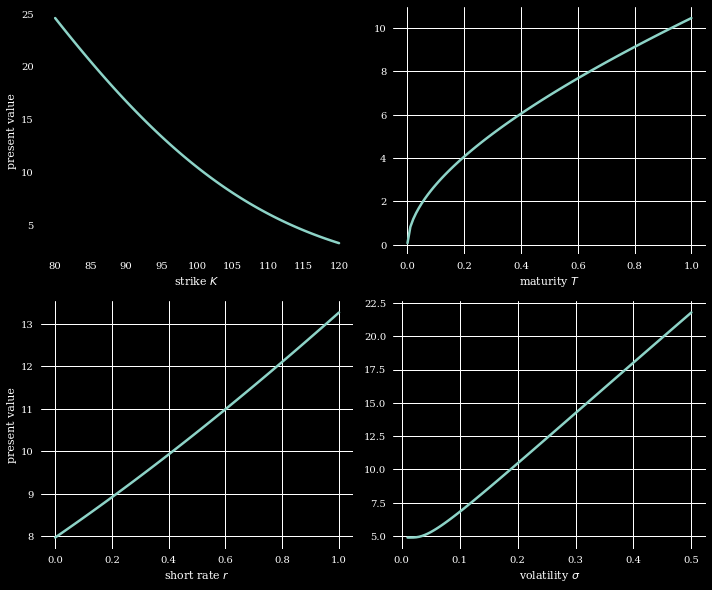

In [148]:
plot_values(BSM_call_value)
plt.savefig('BSM/BSM_call_values.jpg', dpi=300)
    

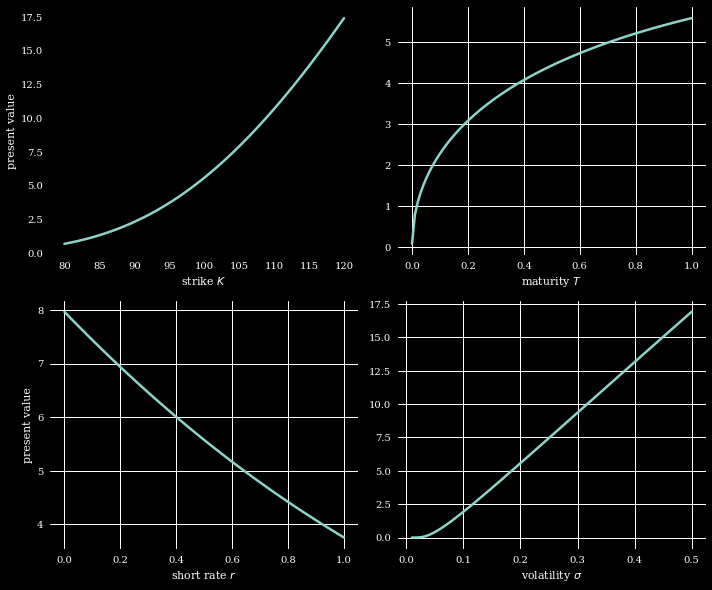

In [149]:


plot_values(BSM_put_value)
plt.savefig('BSM/BSM_put_values.jpg' , dpi=300)



### European Call Greeks

/Users/mw/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


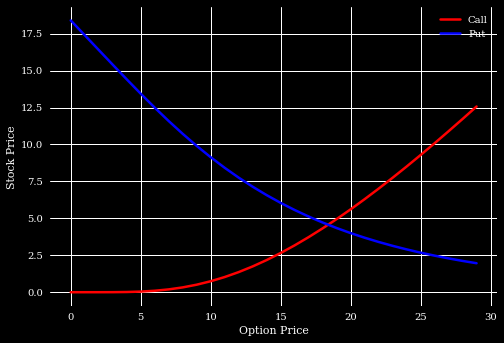

<Figure size 576x396 with 0 Axes>

In [180]:
S = np.arange(0, 30)
vals_call = [BS_call(x, 50, 0.10, 0.2, 10, 0) for x in S]
vals_put = [BS_put(x, 50, 0.10, 0.2, 10, 0) for x in S]
plt.plot(S,vals_call, 'r', label = "Call")
plt.plot(S, vals_put, 'b', label  = "Put")
plt.legend()
plt.ylabel("Stock Price")
plt.xlabel("Option Price")
plt.show()
plt.savefig('Call_Put.jpg', dpi=300)

In [150]:
%run BSM_call_greeks.py

<Figure size 576x396 with 0 Axes>

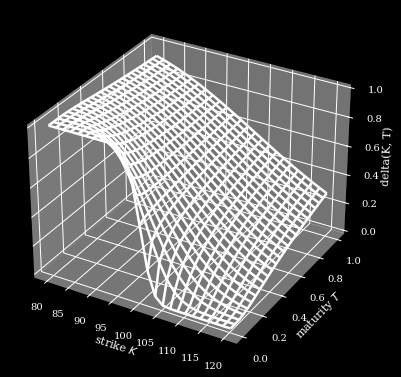

In [151]:
plot_greeks(BSM_delta, 'delta')
plt.savefig('BSM/BSM_delta.jpg' , dpi=300)


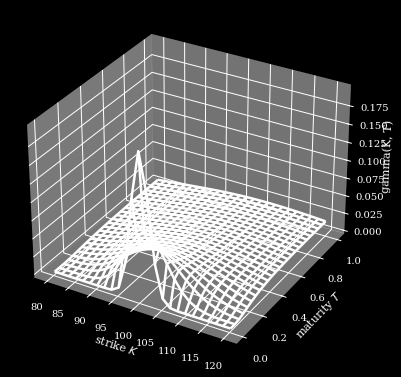

In [152]:
plot_greeks(BSM_gamma, 'gamma')
plt.savefig('BSM/BSM_gamma.jpg', dpi=300)


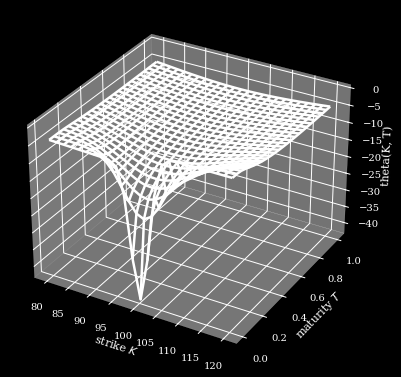

In [153]:
plot_greeks(BSM_theta, 'theta')
plt.savefig('BSM/BSM_theta.jpg', dpi=300)

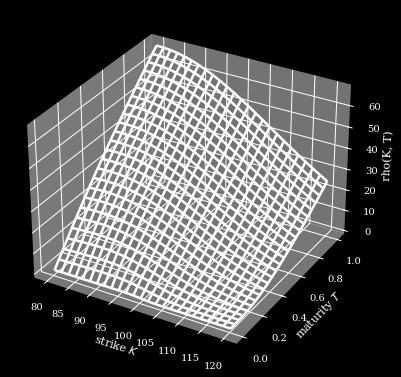

In [154]:
plot_greeks(BSM_rho, 'rho')
plt.savefig('BSM/BSM_rho.jpg', dpi=300)

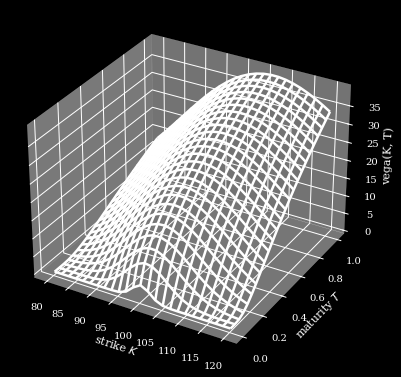

In [155]:
plot_greeks(BSM_vega, 'vega')
plt.savefig('BSM/BSM_vega.jpg', dpi=300)

In [175]:
from scipy.stats import norm

# S: underlying stock price # K: Option strike price # r: risk free rate # D: dividend value # vol: Volatility # T: time to expiry (assumed that we're measuring from t=0 to T)
def d1_calc(S, K, r, vol, T, t):
    # Calculates d1 in the BSM equation     
    return (np.log(S/K) + (r + 0.5 * vol**2)*(T-t))/(vol*np.sqrt(T-t))

def BS_call(S, K, r, vol, T, t):
    d1 = d1_calc(S, K, r, vol, T, t)
    d2 = d1 - vol * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r*T)*norm.cdf(d2)

def BS_put(S, K, r, vol, T, t):
    return BS_call(S, K, r, vol, T, t) - S + np.exp(-r*(T-t))*K

def BS_binary_call(S, K, r, vol, T, t):
    d1 = d1_calc(S, K, r, vol, T, t)
    d2 = d1 - vol * np.sqrt(T-t)
    return np.exp(-r*T)*norm.cdf(d2)

def BS_binary_put(S, K, r, vol, T, t):
    return BS_binary_call(S, K, r, vol, T,t) - S + np.exp(-r*(T-t))*K

########################################################################### #1st Order Greeks 
def delta(S, K, r, vol, T, t, otype):
    d1 = d1_calc(S, K, r, vol, T, t)
    d2 = d1 - vol * np.sqrt(T-t)
    
    if(otype == "call"):
        delta = np.exp(-(T-t))*norm.cdf(d1)
    elif(otype == "put"):
        delta = -np.exp(-(T-t))*norm.cdf(-d1)

    return delta

# Gamma for calls/puts the same
def vega(S, K, r, vol, T, t, otype):
    d1 = d1_calc(S, K, r, vol, T, t)
    return S * norm.pdf(d1) * np.sqrt(T-t)

def rho(S, K, r, vol, T, t, otype):
    d1 = d1_calc(S, K, r, vol, T, t)
    d2 = d1 - vol*np.sqrt(T-t)
    
    if(otype == "call"):
        rho = K*(T-t)*np.exp(-r*(T-t))*norm.cdf(d2)
    elif(otype == "put"):
        rho = -K*(T-t)*np.exp(-r*(T-t))*norm.cdf(-d2)
    return rho

def theta(S, K, r, vol, T, t, otype):
    d1 = d1_calc(S, K, r, vol, T, t)
    d2 = d1 - vol*np.sqrt(T-t)
    
    if(otype == "call"):
        theta = -(S*norm.pdf(d1)*vol / (2*np.sqrt(T-t))) - r*K*np.exp(-r*(T-t))*norm.cdf(d2) 
    elif(otype == "put"):
        theta = -(S*norm.pdf(d1)*vol / (2*np.sqrt(T-t))) + r*K*np.exp(-r*(T-t))*norm.cdf(-d2)

    return theta

#2nd Order Greeks 
def gamma(S, K, r, vol, T, t, otype):
    d1 = d1_calc(S, K, r, vol, T, t)
    gamma = (norm.pdf(d1)) / (S * vol * np.sqrt(T-t))
    
    return gamma

def charm(S, K, r, vol, T, t, otype):
    d1 = d1_calc(S, K, r, vol, T, t)
    d2 = d1 - vol*np.sqrt(T-t)
    charm = -norm.pdf(d1)*(2*r*(T-t) - d2*vol*np.sqrt(T-t))/(2*(T-t)*vol*np.sqrt(T-t))

    return charm


We can now look at the sensitivity of option greeks to a single parameter. I won’t go into any detailed explanations on the greeks here, at a high level they’re typically used as a risk measure on a portfolio of options. One would seek to manage their portfolio greeks within given risk appetites i.e. delta hedging.

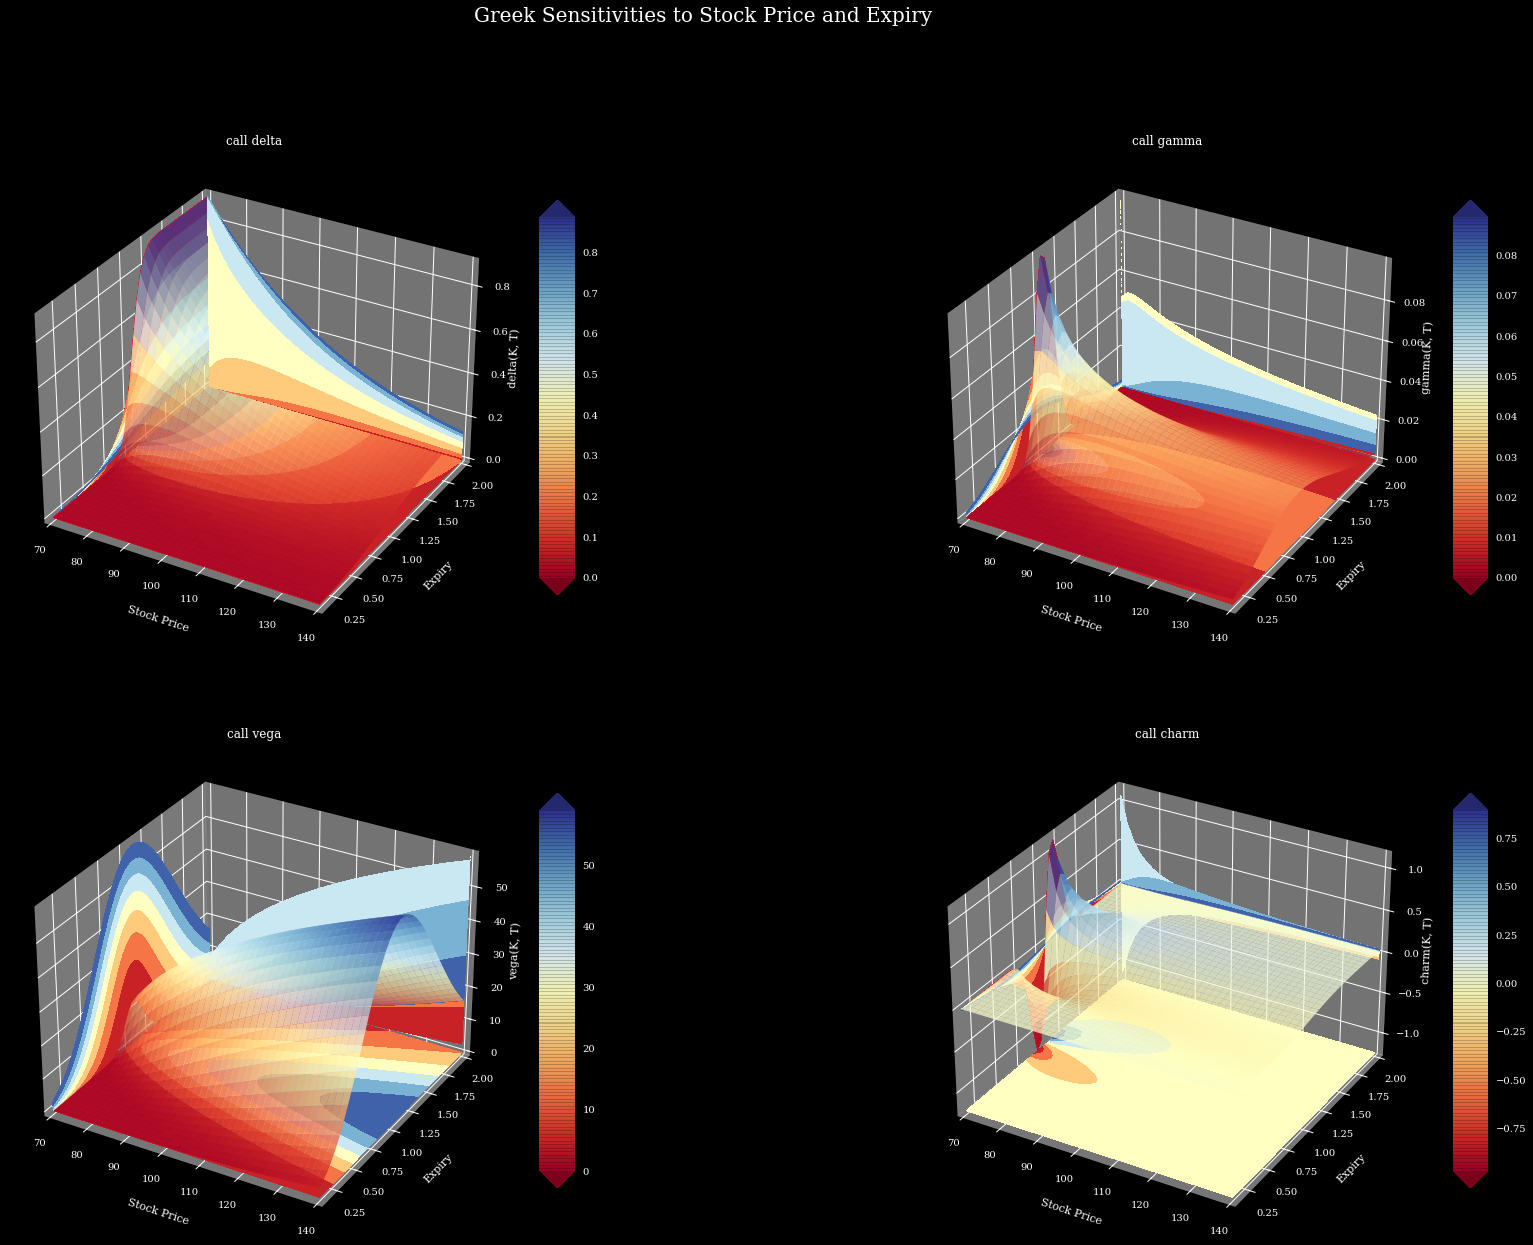

In [181]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


#
def greeks_plot_tool(greek_function, x_var_name, y_var_name,
                    S, K, r, vol, T, t, x, y, otype, plot):
   
    # Initialise vector to store our option values and then iterate over     # Assumption that we're using a constant sized vector length for each variable     # Need to change the variables being iterated over here for each update (possibly a better way to do this)     
    V = np.zeros((len(S), len(S)), dtype=np.float)
    for i in range(len(S)):
        for j in range(len(S)):
            V[i, j] = greek_function(S[i], K[i], r[i], vol[i], T[j], t[i], otype)
 
    # Initiliase plotting canvas
    surf = plot.plot_surface(x, y, V, rstride=1, cstride=1,alpha=0.75,cmap=cm.RdYlBu)
    plot.set_xlabel('\n' + x_var_name, linespacing=4)
    plot.set_ylabel('\n' + y_var_name, linespacing=4)
    plot.set_zlabel("%s(K, T)" % greek_function.__name__)
    plot.set_title("%s %s" % (otype, greek_function.__name__))
    
    # Calculate colour levels based on our meshgrid     
    Vlevels = np.linspace(V.min(),V.max(),num=8,endpoint=True)
    xlevels = np.linspace(x.min(),x.max(),num=8,endpoint=True)
    ylevels = np.linspace(y.min(),y.max(),num=8,endpoint=True)
    
    cset = plot.contourf(x, y, V, Vlevels, zdir='z',offset=V.min(),
                       cmap=cm.RdYlBu,linestyles='dashed')
    cset = plot.contourf(x, y, V, xlevels, zdir='x',offset=x.min(),
                       cmap=cm.RdYlBu,linestyles='dashed')
    cset = plot.contourf(x, y, V, ylevels, zdir='y',offset=y.max(),
                       cmap=cm.RdYlBu,linestyles='dashed')

    # Set our viewing constraints     
    for c in cset.collections:
        c.set_dashes([(0, (2.0, 2.0))]) # Dash contours
    plt.clabel(cset,fontsize=10, inline=1)
    plot.set_xlim(x.min(),x.max())
    plot.set_ylim(y.min(),y.max())
    plot.set_zlim(V.min(),V.max())

    # Colorbar
    colbar = plt.colorbar(surf, shrink=1.0, extend='both', aspect = 10)
    l,b,w,h = plt.gca().get_position().bounds
    ll,bb,ww,hh = colbar.ax.get_position().bounds
    colbar.ax.set_position([ll, b+0.1*h, ww, h*0.8])
    
        
S = np.linspace(70, 140, 40)
K = np.linspace(105.0, 105.0, 40)
T = np.linspace(0.1, 2.0, 40)
t = np.linspace(0.0, 0.0, 40)
r = np.linspace(0.0, 0.0, 40)
vol = np.linspace(0.12, 0.12, 40)

x, y  = np.meshgrid(S, T)

fig = plt.figure(figsize=(30,20))
fig.suptitle("Greek Sensitivities to Stock Price and Expiry",fontsize=20, fontweight='normal')
greeks = [delta, gamma, vega, charm]

for i in range(len(greeks)):
    ax = fig.add_subplot(2, 2, i+1, projection='3d')
    greeks_plot_tool(greeks[i],"Stock Price", "Expiry", S, K, r, vol, T, t, x, y, "call", ax)
plt.savefig('Greek Sensitivities to Stock Price and Expiry.jpg', dpi=300)
plt.show()

# Option Database

In [2]:
import QuantLib as ql # version 1.5
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
# option data
maturity_date = ql.Date(15, 1, 2022)
spot_price = 127.62
strike_price = 130
volatility = 0.20 # the historical vols for a year
dividend_rate =  0.0163
option_type = ql.Option.Call

risk_free_rate = 0.001
day_count = ql.Actual365Fixed()
calendar = ql.UnitedStates()

calculation_date = ql.Date(17, 3, 2021)
ql.Settings.instance().evaluationDate = calculation_date

In [16]:
# construct the European Option
payoff = ql.PlainVanillaPayoff(option_type, strike_price)
exercise = ql.EuropeanExercise(maturity_date)
european_option = ql.VanillaOption(payoff, exercise)

In [17]:
spot_handle = ql.QuoteHandle(
    ql.SimpleQuote(spot_price)
)
flat_ts = ql.YieldTermStructureHandle(
    ql.FlatForward(calculation_date, risk_free_rate, day_count)
)
dividend_yield = ql.YieldTermStructureHandle(
    ql.FlatForward(calculation_date, dividend_rate, day_count)
)
flat_vol_ts = ql.BlackVolTermStructureHandle(
    ql.BlackConstantVol(calculation_date, calendar, volatility, day_count)
)
bsm_process = ql.BlackScholesMertonProcess(spot_handle, 
                                           dividend_yield, 
                                           flat_ts, 
                                           flat_vol_ts)

In [19]:
european_option.setPricingEngine(ql.AnalyticEuropeanEngine(bsm_process))
bs_price = european_option.NPV()
print ("The theoretical price is ", bs_price)

The theoretical price is  7.439018385448017


In [20]:
def binomial_price(bsm_process, steps):
    binomial_engine = ql.BinomialVanillaEngine(bsm_process, "crr", steps)
    european_option.setPricingEngine(binomial_engine)
    return european_option.NPV()

steps = range(2, 100, 1)
prices = [binomial_price(bsm_process, step) for step in steps]

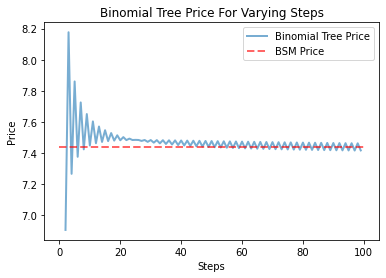

In [21]:
plt.plot(steps, prices, label="Binomial Tree Price", lw=2, alpha=0.6)
plt.plot([0,100],[bs_price, bs_price], "r--", label="BSM Price", lw=2, alpha=0.6)
plt.xlabel("Steps")
plt.ylabel("Price")
plt.title("Binomial Tree Price For Varying Steps")
plt.legend()

Calculating greeks ...
Plotting surface ...


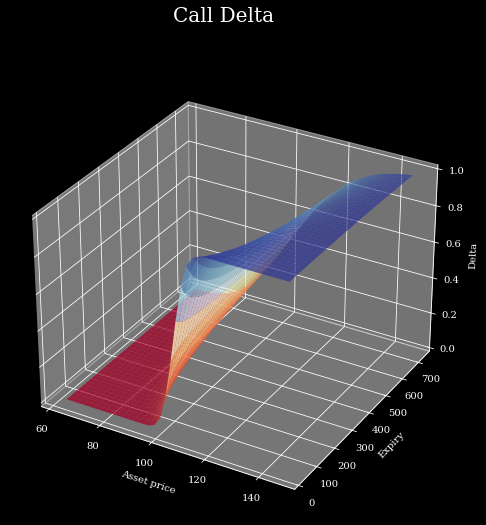

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import math
from matplotlib import cm
import options_analytics
from  options_analytics import BSMerton
plt.style.use('dark_background')
plt.rcParams['lines.linewidth'] = 2.5
plt.rcParams['font.family'] = 'serif'

# Option parameters
sigma = 0.12 # Flat volatility 
strike = 105.0 # Fixed strike
epsilon = 0.4
shortexpiry = 30 
longexpiry = 720 
riskfree = 0.00
divrate = 0.00

# The % on the left/right of Strike.
# Asset prices are centered around Spot ("ATM Spot") # Shortest expiry in days
# Longest expiry in days
# Continuous risk free rate
# Continuous div rate
# Grid definition
dx, dy = 40, 40 # Steps throughout asset price and expiries axis
# xx: Asset price axis , yy: expiry axis , zz: greek axis
xx, yy = np.meshgrid(np.linspace(strike*(1-epsilon), (1+epsilon)*strike, dx), \
np.linspace(shortexpiry , longexpiry , dy))
print ("Calculating greeks ...")
zz = np.array([BSMerton([1,x,strike,riskfree,divrate,y,sigma]).Delta for
x,y in zip(np.ravel(xx), np.ravel(yy))])
zz = zz.reshape(xx.shape)
# Plot greek surface
print ("Plotting surface ...")
fig = plt.figure(figsize=(10, 8.3))
fig.suptitle("Call Delta",fontsize=20) 
ax = fig.gca(projection="3d")
surf = ax.plot_surface(xx, yy, zz,rstride=1, cstride=1,alpha=0.75,cmap=cm.RdYlBu) 
ax.set_xlabel("Asset price")
ax.set_ylabel("Expiry")
ax.set_zlabel("Delta")
# Plot 3D contour
zzlevels = np.linspace(zz.min(),zz.max(),num=8,endpoint=True) 
xxlevels = np.linspace(xx.min(),xx.max(),num=8,endpoint=True) 
yylevels = np.linspace(yy.min(),yy.max(),num=8,endpoint=True)

Calculating greeks ...
Plotting surface ...


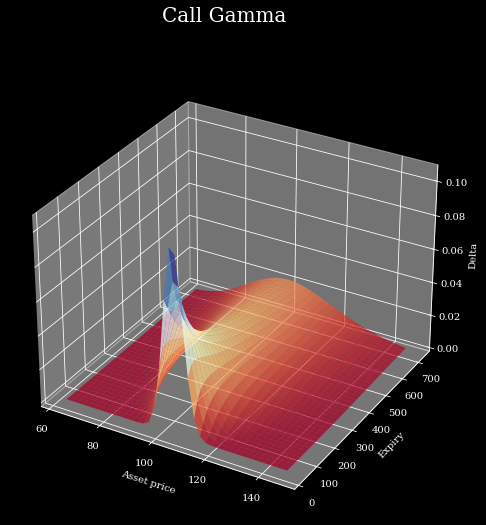

In [7]:
dx, dy = 40, 40 # Steps throughout asset price and expiries axis
# xx: Asset price axis , yy: expiry axis , zz: greek axis
xx, yy = np.meshgrid(np.linspace(strike*(1-epsilon), (1+epsilon)*strike, dx), \
np.linspace(shortexpiry , longexpiry , dy))
print ("Calculating greeks ...")
zz = np.array([BSMerton([1,x,strike,riskfree,divrate,y,sigma]).Gamma for
x,y in zip(np.ravel(xx), np.ravel(yy))])
zz = zz.reshape(xx.shape)
# Plot greek surface
print ("Plotting surface ...")
fig = plt.figure(figsize=(10, 8.3))
fig.suptitle("Call Gamma",fontsize=20) 
ax = fig.gca(projection="3d")
surf = ax.plot_surface(xx, yy, zz,rstride=1, cstride=1,alpha=0.75,cmap=cm.RdYlBu) 
ax.set_xlabel("Asset price")
ax.set_ylabel("Expiry")
ax.set_zlabel("Delta")
# Plot 3D contour
zzlevels = np.linspace(zz.min(),zz.max(),num=8,endpoint=True) 
xxlevels = np.linspace(xx.min(),xx.max(),num=8,endpoint=True) 
yylevels = np.linspace(yy.min(),yy.max(),num=8,endpoint=True)

## Know Your Options - Data Analysis

In [1]:
import datetime
import re
import pandas as pd
import QuantLib as ql
import pandas as pd
import numpy as np
import yfinance as yf
from yahoo_fin.stock_info import get_quote_table
from pylab import plt
plt.style.use('dark_background')
import pandas as pd

In [6]:
def filter_by_moneyness(df, pct_cutoff=0.2):
    crit1 = (1-pct_cutoff)*df.Strike < df.Underlying
    crit2 = df.Underlying< (1+pct_cutoff)*df.Strike
    return (df.loc[crit1 & crit2].reset_index(drop=True))

In [2]:
def options_chain(symbol):
    info = get_quote_table(symbol)
    current_price = info["Quote Price"]
    tk = yf.Ticker(symbol)
    exps = tk.options
    options = pd.DataFrame()
    for e in exps:
        opt = tk.option_chain(e)
        opt = pd.DataFrame().append(opt.calls).append(opt.puts)
        opt['expirationDate'] = e
        options = options.append(opt, ignore_index=True)
    options['expirationDate'] = pd.to_datetime(options['expirationDate']) + datetime.timedelta(days = 1)
    options['yte'] = (options['expirationDate'] - datetime.datetime.today()).dt.days / 365
    options['dte'] = (options['expirationDate'] - datetime.datetime.today()).dt.days
    options['CALL'] = options['contractSymbol'].str[4:].apply(
        lambda x: "C" in x)
    options[['bid', 'ask', 'strike']] = options[['bid', 'ask', 'strike']].apply(pd.to_numeric)
    options['midpoint'] = (options['bid'] + options['ask']) / 2 
    options['spread'] =  (options['ask'] - options['bid'])
    options['spread_pct'] = (options['ask'] - options['bid'])/options['ask'] 
    options['Underlying'] = current_price 
    options = options.drop(columns = ['contractSize', 'currency', 'change', 'percentChange', 'lastTradeDate'])
    return pd.DataFrame({
            "Underlying": current_price,
            "Ticker": symbol,
            "Expiry": options["expirationDate"],
            "YTE": options["yte"],
            "DTE": options["dte"],
            "Call": options["CALL"],
            "IV": options["impliedVolatility"],        
            "Strike": options["strike"],
            "Last": options["lastPrice"],
            "Bid": options["bid"],
            "Ask": options["ask"],
            "Midpoint": options['midpoint'],
            "Spread": options['spread'],
            "Spread_Pct": options['spread_pct'],
            "AKA": options["contractSymbol"]})

In [3]:
aapl=options_chain("AAPL")

In [13]:
aapl

,Underlying,Ticker,Expiry,YTE,DTE,Call,IV,Strike,Last,Bid,Ask,Midpoint,Spread,Spread_Pct,AKA
0,124.760002,AAPL,2021-03-20,0.00274,1,True,5.375003,30.0,92.74,94.65,94.90,94.775,0.25,0.002634,AAPL210319C00030000
1,124.760002,AAPL,2021-03-20,0.00274,1,True,8.744145,35.0,88.25,88.50,90.90,89.700,2.40,0.026403,AAPL210319C00035000
2,124.760002,AAPL,2021-03-20,0.00274,1,True,7.878906,40.0,84.16,83.55,85.90,84.725,2.35,0.027357,AAPL210319C00040000
3,124.760002,AAPL,2021-03-20,0.00274,1,True,7.507813,45.0,73.89,78.30,81.20,79.750,2.90,0.035714,AAPL210319C00045000
4,124.760002,AAPL,2021-03-20,0.00274,1,True,6.783205,47.5,74.10,76.10,78.40,77.250,2.30,0.029337,AAPL210319C00047500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2639,124.760002,AAPL,2023-03-18,1.99726,729,False,0.346442,185.0,66.80,67.80,68.95,68.375,1.15,0.016679,AAPL230317P00185000
2640,124.760002,AAPL,2023-03-18,1.99726,729,False,0.346564,190.0,68.81,71.85,73.25,72.550,1.40,0.019113,AAPL230317P00190000
2641,124.760002,AAPL,2023-03-18,1.99726,729,False,0.346534,195.0,79.56,76.50,77.60,77.050,1.10,0.014175,AAPL230317P00195000
2642,124.760002,AAPL,2023-03-18,1.99726,729,False,0.346412,200.0,82.10,81.05,82.00,81.525,0.95,0.011585,AAPL230317P00200000


In [7]:
moneyness=filter_by_moneyness(aapl)

## Know Your Options - Data Analysis

In [68]:
info = get_quote_table("AAPL")
current_price = info["Quote Price"]
yield_re = re.compile(r"\((?P<value>(\d+\.\d+))%\)")

In [9]:
options_df = moneyness

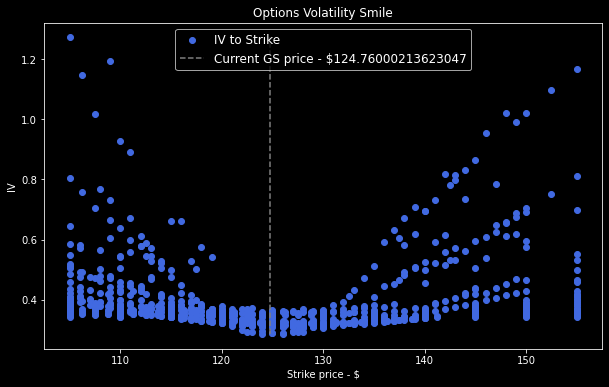

In [11]:
curr_price_ = options_df.iloc[0,0]
plt.figure(figsize=(10, 6))
plt.scatter(options_df.Strike, options_df.IV, label='IV to Strike', \
            c='royalblue')
plt.vlines(curr_price_, options_df.IV.min(), \
           options_df.IV.max(), \
           label='Current GS price - ${}'.format(curr_price_), \
           linestyles='--', colors='gray')
plt.xlabel('Strike price - $')
plt.ylabel('IV')
plt.title('Options Volatility Smile')
plt.legend(fontsize='large')
plt.savefig('volatilitysmile.jpg', dpi=100)
plt.show()

## Load Data

In [9]:
options_df=pd.read_csv('data/sp500_option_greeks.csv')

View Data

In [11]:
print(', '.join(x for x in options_df.columns))

Unnamed: 0, Underlying, Ticker, Name, Strike, Last, Bid, Ask, NPV, Delta, Gamma, Theta, IV, Volatility


Clean Data

In [13]:
options_df=options_df.drop('Unnamed: 0', axis=1)

In [24]:
options_df

,Underlying,Ticker,Name,Strike,Last,Bid,Ask,NPV,Delta,Gamma,Theta,IV,Volatility
0,124.040001,A,A210319C00130000,130.0,0.06,0.05,0.15,0.060216,0.039667,0.022613,-0.023413,0.283210,26.429949
1,124.040001,A,A210319C00135000,135.0,0.01,0.00,0.05,0.010015,0.006736,0.004083,-0.005857,0.365241,31.779924
2,124.040001,A,A210319P00130000,130.0,16.60,5.80,6.40,16.604741,0.521030,0.008104,-1.927491,0.384772,336.398782
3,124.040001,A,A210319P00135000,135.0,14.98,10.70,12.20,14.984931,0.484260,0.008049,-1.947099,0.595219,338.771747
4,124.040001,A,A210416C00130000,130.0,1.50,1.35,1.70,1.505684,0.224428,0.026466,-0.025529,0.262092,36.399299
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3004,154.839996,ZTS,ZTS220121P00160000,160.0,17.80,0.00,0.00,17.921559,0.413713,0.006299,-0.008425,0.000010,77.457326
3005,154.839996,ZTS,ZTS220121P00165000,165.0,20.10,0.00,0.00,20.234835,0.409183,0.005078,-0.011436,0.000010,86.874221
3006,154.839996,ZTS,ZTS220121P00170000,170.0,27.30,21.90,25.50,27.457405,0.439333,0.003683,-0.018162,0.282386,107.972467
3007,154.839996,ZTS,ZTS230120C00165000,165.0,21.30,0.00,0.00,21.616630,0.403659,0.004781,-0.002120,0.007822,85.589116


In [14]:
print(', '.join(x for x in options_df.columns))

Underlying, Ticker, Name, Strike, Last, Bid, Ask, NPV, Delta, Gamma, Theta, IV, Volatility


Dealing with NaN values

In [15]:
def custom_describe(df, nidx=3, nfeats=20):
    ''' Concat transposed topN rows, numerical desc & dtypes '''

    print(df.shape)
    nrows = df.shape[0]
    
    rndidx = np.random.randint(0,len(df),nidx)
    dfdesc = df.describe().T

    for col in ['mean','std']:
        dfdesc[col] = dfdesc[col].apply(lambda x: np.round(x,2))
 
    dfout = pd.concat((df.iloc[rndidx].T, dfdesc, df.dtypes), axis=1, join='outer')
    dfout = dfout.loc[df.columns.values]
    dfout.rename(columns={0:'dtype'}, inplace=True)
    
    # add count nonNAN, min, max for string cols
    nan_sum = df.isnull().sum()
    dfout['count'] = nrows - nan_sum
    dfout['min'] = df.min().apply(lambda x: x[:6] if type(x) == str else x)
    dfout['max'] = df.max().apply(lambda x: x[:6] if type(x) == str else x)
    dfout['nunique'] = df.apply(pd.Series.nunique)
    dfout['nan_count'] = nan_sum
    dfout['pct_nan'] = nan_sum / nrows
    
    return dfout.iloc[:nfeats, :]

In [16]:
custom_describe(options_df)

(3009, 13)


,1599,2240,2541,count,mean,std,min,25%,50%,75%,max,dtype,nunique,nan_count,pct_nan
Underlying,83.72,188.87,165.76,3009,227.35,265.55,16.93,83.669998,146.990005,273.019989,2439.5,float64,317,0,0.000000
Ticker,DHI,MCK,PXD,3009,NaN,NaN,A,NaN,NaN,NaN,ZTS,object,321,0,0.000000
Name,DHI210521P00090000,MCK220121C00200000,PXD220121C00170000,3009,NaN,NaN,A21031,NaN,NaN,NaN,ZTS230,object,3009,0,0.000000
Strike,90,200,170,3009,241.33,283.04,18,90.000000,155.000000,297.500000,2600,float64,215,0,0.000000
Last,20.27,17.01,2,3009,21.56,46.18,0.01,3.500000,9.950000,25.550000,1030,float64,1580,0,0.000000
Bid,0,0,0,3006,6.60,19.78,0,0.000000,0.000000,4.800000,657,float64,687,3,0.000997
Ask,0,0,0,3008,7.54,20.97,0,0.000000,0.000000,6.512500,667,float64,692,1,0.000332
NPV,20.3063,17.1943,2.19666,3009,21.72,46.19,0.0100147,3.542070,10.105039,25.761978,1028.59,float64,3008,0,0.000000
Delta,0.535528,0.364772,0.242901,3009,0.37,0.14,0.0067364,0.293713,0.389311,0.458250,0.85305,float64,3008,0,0.000000
Gamma,0.00571203,0.00554896,0.0253954,3009,0.01,0.02,0.000112673,0.004144,0.008700,0.016787,0.218815,float64,3008,0,0.000000


In [20]:
options_df['Ask'] = options_df['Ask'].fillna(0)
options_df['Bid'] = options_df['Bid'].fillna(0)

In [21]:
custom_describe(options_df)

(3009, 13)


,2616,1027,2639,count,mean,std,min,25%,50%,75%,max,dtype,nunique,nan_count,pct_nan
Underlying,125.27,52.14,45.81,3009,227.35,265.55,16.93,83.669998,146.990005,273.019989,2439.5,float64,317,0,0.0
Ticker,ROST,AFL,SEE,3009,NaN,NaN,A,NaN,NaN,NaN,ZTS,object,321,0,0.0
Name,ROST220121P00135000,AFL220121P00055000,SEE210416C00048000,3009,NaN,NaN,A21031,NaN,NaN,NaN,ZTS230,object,3009,0,0.0
Strike,135,55,48,3009,241.33,283.04,18,90.000000,155.000000,297.500000,2600,float64,215,0,0.0
Last,46.03,8.7,2.1,3009,21.56,46.18,0.01,3.500000,9.950000,25.550000,1030,float64,1580,0,0.0
Bid,46.7,6.8,1.15,3009,6.59,19.77,0,0.000000,0.000000,4.800000,657,float64,687,0,0.0
Ask,49.7,7.1,1.6,3009,7.53,20.97,0,0.000000,0.000000,6.500000,667,float64,692,0,0.0
NPV,46.3428,8.90494,2.10648,3009,21.72,46.19,0.0100147,3.542070,10.105039,25.761978,1028.59,float64,3008,0,0.0
Delta,0.571794,0.429123,0.347101,3009,0.37,0.14,0.0067364,0.293713,0.389311,0.458250,0.85305,float64,3008,0,0.0
Gamma,0.00222417,0.0123503,0.0404952,3009,0.01,0.02,0.000112673,0.004144,0.008700,0.016787,0.218815,float64,3008,0,0.0


In [25]:
data = options_df.copy()

In [51]:
median_sprd = data.groupby(['Ticker', 'DaysToExpiration', 'Type'],
                           as_index=False)['Spread'].median()

test_syms = ['AAPL', 'TSLA', 'AMD', 'NVDA', 'AMZN']
sel_med_sprd = median_sprd.query('Symbol in @test_syms').dropna(subset=['Spread'])
# to plot symbols have to cast to type str
sel_med_sprd.Symbol = sel_med_sprd.Symbol.astype(str)
print(sel_med_sprd.head())
print(sel_med_sprd.info())

   Symbol  DaysToExpiration  Type  Spread
52   AAPL            3.0000  call  0.0100
53   AAPL            3.0000   put  0.0300
54   AAPL           10.0000  call  0.0100
55   AAPL           10.0000   put  0.1000
56   AAPL           17.0000  call  0.0200
<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 52 to 6668
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Symbol            164 non-null    object 
 1   DaysToExpiration  164 non-null    float64
 2   Type              164 non-null    object 
 3   Spread            164 non-null    float64
dtypes: float64(2), object(2)
memory usage: 6.4+ KB
None
